<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_MOD3_AML/blob/main/CORE1_VINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Carga de datos:
  - Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
  - El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

In [ ]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Archivos en la carpeta:", files)
path = os.path.join(path, files[0])
print("Path to dataset file:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2
Archivos en la carpeta: ['winequality-red.csv']
Path to dataset file: /root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2/winequality-red.csv


In [ ]:
# Cargar datos
df = pd.read_csv(path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2. Exploración y preprocesamiento de datos:
- Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
- Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.


In [ ]:
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


primero vemos que en teoria nulos no hay

In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000  

In [ ]:
# Verificar valores nulos
print("\n¿Hay valores nulos?")
print(df.isnull().sum())


¿Hay valores nulos?
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


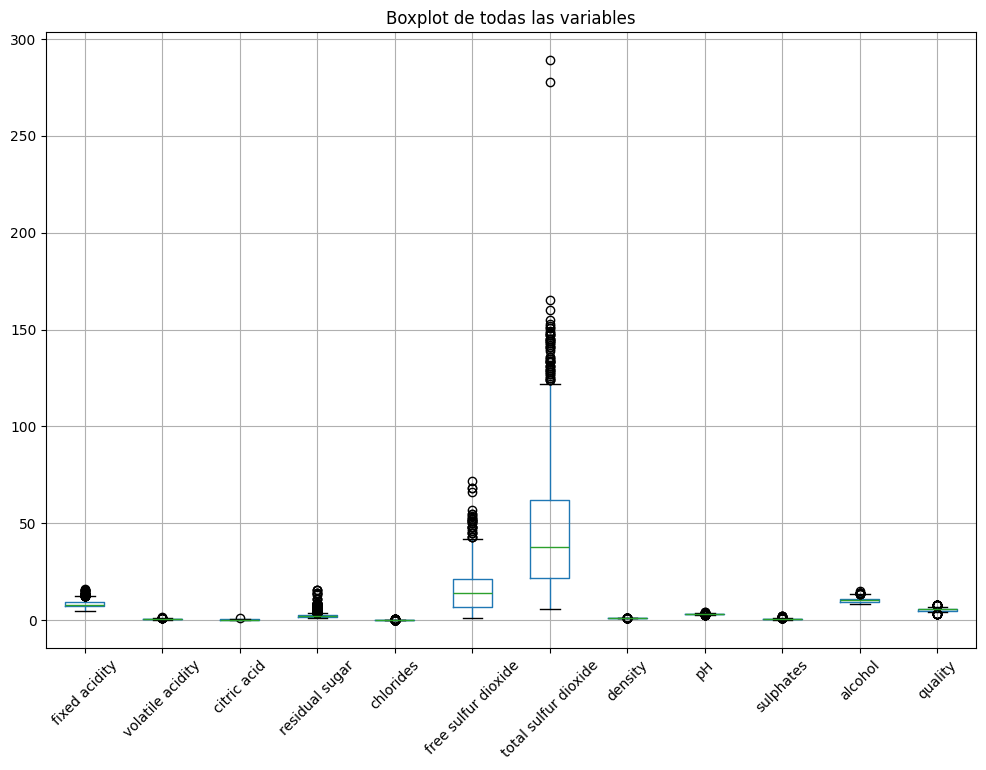

In [ ]:
# Boxplot para detectar valores atípicos
plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot de todas las variables")
plt.show()


In [ ]:
# Normalizar las variables (excepto la columna 'quality', que es la etiqueta)
features = df.drop(columns=["quality"])  # Excluir 'quality'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convertir a DataFrame para facilidad de uso
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

print("\nDatos normalizados (primeras filas):")
print(features_scaled_df.head())



Datos normalizados (primeras filas):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0

In [ ]:
# Normalizar las variables (excepto la columna 'quality', que es la etiqueta)
features = df.drop(columns=["quality"])  # Excluir 'quality'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convertir a DataFrame para facilidad de uso
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

print("\nDatos normalizados (primeras filas):")
print(features_scaled_df.head())



Datos normalizados (primeras filas):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0

3. Aplicación de PCA:
- Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
- Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

In [ ]:
# Aplicar PCA
pca = PCA()
pca.fit(features_scaled)  # 'features_scaled' viene del paso anterior (datos normalizados)

# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Mostrar la cantidad de varianza explicada por cada componente
for i, var in enumerate(cumulative_variance):
    print(f"Componentes {i+1}: Varianza acumulada = {var:.2%}")

# Determinar el número mínimo de componentes necesarios para capturar el 90% de la variabilidad
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nNúmero de componentes necesarios para capturar al menos el 90% de la variabilidad: {n_components_90}")

Componentes 1: Varianza acumulada = 28.17%
Componentes 2: Varianza acumulada = 45.68%
Componentes 3: Varianza acumulada = 59.78%
Componentes 4: Varianza acumulada = 70.81%
Componentes 5: Varianza acumulada = 79.53%
Componentes 6: Varianza acumulada = 85.52%
Componentes 7: Varianza acumulada = 90.83%
Componentes 8: Varianza acumulada = 94.68%
Componentes 9: Varianza acumulada = 97.81%
Componentes 10: Varianza acumulada = 99.46%
Componentes 11: Varianza acumulada = 100.00%

Número de componentes necesarios para capturar al menos el 90% de la variabilidad: 7


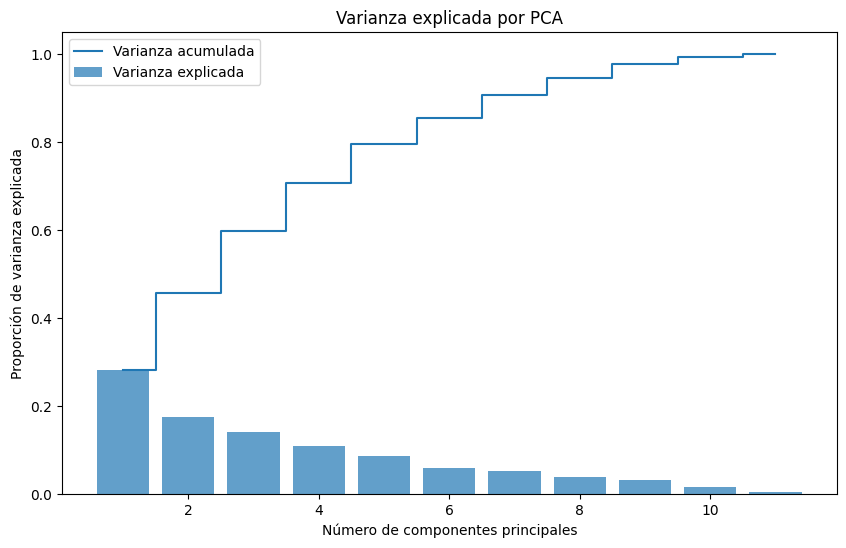

In [ ]:
# Gráfico de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Varianza explicada')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por PCA')
plt.legend(loc='best')
plt.show()


4. Interpretación de los componentes principales:
- Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
- Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

Los coeficientes de cada componente principal indican qué variables tienen mayor influencia en esa componente. Esto se obtiene a través de la matriz de componentes (pca.components_), que muestra la contribución de cada variable original a cada componente principal.
- Interpretación:
Las variables con coeficientes absolutos más altos tienen la mayor influencia en el componente principal.
Esto puede revelar grupos de variables correlacionadas que son capturadas por un solo componente.

Cómo la reduccion simplifica...?

- Elimina redundancia: Al reducir las dimensiones, PCA elimina variables correlacionadas, evitando que el modelo se "distraiga" con información redundante.
- Reduce complejidad: Trabajar con menos dimensiones acelera el entrenamiento y reduce el riesgo de sobreajuste.
- Facilita la interpretación: Al identificar los componentes principales, podemos centrarnos en los patrones generales en lugar de analizar todas las variables originales.


5. Visualización y comparación:
- Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
- Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

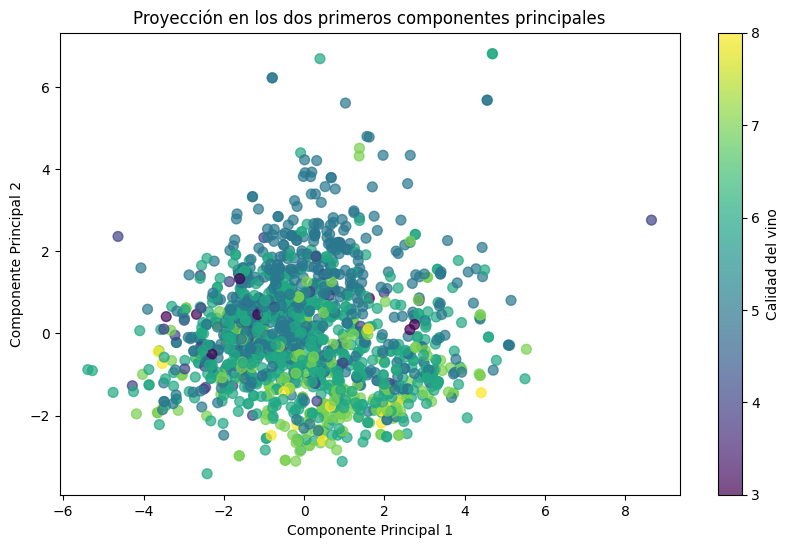

In [ ]:
# Podemos proyectar los datos en los dos primeros componentes principales (que explican el 45.68% de la varianza) y observar su distribución.

# Proyección en los dos primeros componentes principales
X_pca_2d = pca.transform(features_scaled)[:, :2]

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=df['quality'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Calidad del vino')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección en los dos primeros componentes principales')
plt.show()


Existe cierta concentración de puntos cerca del centro (cerca de 0 en ambos componentes principales), lo que sugiere que muchas muestras tienen características similares.
Las calidades más bajas (por ejemplo, 3 o 4, representadas por colores oscuros) están mezcladas con calidades medias (5 o 6), mientras que algunas calidades más altas (7 u 8, en colores claros) están un poco más alejadas, aunque no completamente separadas.

Como los dos primeros componentes explican el 45.68% de la variabilidad, esto significa que más del 50% de la información aún está en los otros componentes. Por ello, puede ser difícil identificar patrones claros solo con estos dos componentes.

